# Lecture 5. Regression introduction

## Problem statement

Assume we have $m$ pairs of measurements $(x_i, y_i)$, where $ x_i \in \mathbb{R}^n, \; y_i \in \mathbb{R}^p$. We want to find function $f$, such that 
$$
\frac{1}{2}\|f(x_i) - y_i \|^2_2 \to \min
$$

Assume we have $m$ pairs of measurements $(x_i, y_i)$, where $ x_i \in \mathbb{R}^n, \; y_i \in \mathbb{R}^p$. We want to find *parametric* function $f(x, w)$, such that 
$$
\frac{1}{2}\|f(x_i, w) - y_i \|^2_2 \to \min_w
$$

## Linear least squares problem

Consider the case of linear dependence between $x_i \in \mathbb{R}^n$ and $y_i \in \mathbb{R}, \; i = 1,\ldots, m$.

Then
$$
f(x, w) = x^{\top}w
$$
or
$$
f(X, W) = XW
$$
Least squares problem is stated as
$$
L(w|X, y) = \frac{1}{2}\sum\limits_{i=1}^m (x^{\top}_i w - y_i)^2 = \frac{1}{2}\|Xw - y \|^2_2 \to \min_w
$$

**Note.** Further $m \geq n$ and $\mathrm{rank}(X) = n$ except special cases

### Normal equation

From the first order necessary condition and convexity of the norm we get
$$
L'(w^* | X, y) = 0 \Rightarrow (X^{\top}X)w^* = X^{\top}y
$$
or
$$
w^* = (X^{\top}X)^{-1}X^{\top}y = X^+y = X^{\dagger}y,
$$
where $X^{\dagger} = X^+ = (X^{\top}X)^{-1}X^{\top}$ - *pseudo-inverse matrix*.

### Direct mehods

#### Cholesky factorization

**Definition.** Any matrix $A \in \mathbb{S}^n_{++}$ has unique Cholesky factorization:
$$
A = LL^{\top},
$$
where $L$ &mdash; lower tringular matrix.

Algorithm:
1. Compute $X^{\top}X$ and $X^{\top}y$
2. Compute Cholesky factorization of the matrix $X^{\top}X = LL^\top$
3. Find $w^*$ from the forward and backward substitution
$$
Ly = X^\top y
$$
$$
L^\top w^* = y
$$

### Pro & contra

Pro 

- when $m \gg n$ storing of $X^{\top}X$ requires much less memory, than storing $X$
- if matrix $X$ is sparse, there exist method, which give sparse Cholesky factor

Contra

- condition number of $X^{\top}X$ equals square of the condition number of the matrix $X$. Error is proportional to the condition number.
- it's necessary to compute $X^{\top}X$

#### QR factorization

**Definition.** Any matrix $A \in \mathbb{R}^{m \times n}$ can be represented in the form 
$$
A = QR,
$$
where $Q \in \mathbb{R}^{m \times m}$ is unitary, and $R \in \mathbb{R}^{m \times n}$ is rectangular upper triangular.

#### Application

1. Compute QR factorization of the matrix $X$: $X = QR$.
2. $Q = [Q_1, Q_2]$, $Q_1 \in \mathbb{R}^{m \times n}$,
$R = 
\begin{bmatrix}
R_1\\
0
\end{bmatrix}$,
$R_1 \in \mathbb{R}^{n \times n}$ - square upper triangular matrix
2. The problem is reformulated as: 
$$
\|R_1w - Q_1^{\top}y \|^2_2 \to \min_w
$$
and normal equation
$$
R_1w^* = Q_1^{\top}y
$$
We get linear system with square upper triangular matrix, which is easily solved by backward substitution.

### Pro & contra

Pro 

- error is proportional to the condition number of the matrix $X$, but not $X^{\top}X$
- more stable than one is based on the Cholesky factorization

Contra

- we can not control the stability of the solution

#### SVD

**Definition.** Any matrix $A \in \mathbb{R}^{m \times n}$ can be represented in the form
$$
A = U\widehat{\Sigma} V^* = [U_1, U_2] \begin{bmatrix} \Sigma\\ 0 \end{bmatrix} V^*,
$$
where $U \in \mathbb{R}^{m \times m}$ is unitary, $U_1 \in \mathbb{R}^{m \times n}$, $\Sigma = \mathrm{diag}(\sigma_1, \ldots, \sigma_n) \in \mathbb{R}^{n \times n}$ is diagonal with singular values $\sigma_i$ on the diagonal, and $V \in \mathbb{R}^{n \times n}$ is unitary.

#### Application

$$
\| Xw - y\|^2_2 = \left\| \begin{bmatrix} \Sigma \\ 0 \end{bmatrix} V^* w - \begin{bmatrix} U_1^{\top} \\ U_2^{\top} \end{bmatrix}y \right\|^2_2 \sim \| \Sigma V^* w - U_1^{\top}y \|^2_2
$$
Solution of the linear system with **square** matrix:
$$
w^* = V\Sigma^{-1}U_1^{\top}y = \sum\limits_{i=1}^n \frac{u_i^{\top}y}{\sigma_i} v_i,
$$
where $v_i$ и $u_i$ are columns of the matrices $V$ and $U_1$ 

### Pro & contra

Pro 

- effect of the perturbation in $y$
- stability control: small singular values can be discarded
- if the matrix is close to singular, then only SVD shows this

Contra

- SVD computation is more computationally expensive than compuations of Cholesky and QR factorization

### Experiments

In [1]:
import numpy as np

n = 1000
m = 2 * n
X = np.random.randn(m, n)
w = np.random.randn(n)
y = X.dot(w) + 1e-5 * np.random.randn(m)

w_est = np.linalg.solve(X.T.dot(X), X.T.dot(y))
print(np.linalg.norm(w - w_est))

1.0030071923378466e-05


In [2]:
import scipy.linalg as sclin
import scipy.sparse.linalg as scsplin

def CholSolve(X, y):
    res = sclin.cho_factor(X.T.dot(X), lower=True)
    return sclin.cho_solve(res, X.T.dot(y))

def QRSolve(X, y):
    Q, R = sclin.qr(X)
    return sclin.solve_triangular(R[:R.shape[1], :], Q[:, :R.shape[1]].T.dot(y))

def SVDSolve(X, y):
    U, s, V = sclin.svd(X, full_matrices=False)    
    return V.T.dot(np.diagflat(1.0 / s).dot(U.T.dot(y)))

def CGSolve(X, y):
    def mv(x):
        return X.T.dot(X.dot(x))
    LA = scsplin.LinearOperator((X.shape[1], X.shape[1]), matvec=mv)
    w, _ = scsplin.cg(LA, X.T.dot(y), tol=1e-10)
    return w

def NPSolve(X, y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(y))

def LSQRSolve(X, y):
    res = scsplin.lsqr(X, y)
    return res[0]

In [3]:
w_chol = CholSolve(X, y)
print(np.linalg.norm(w - w_chol))
w_qr = QRSolve(X, y)
print(np.linalg.norm(w - w_qr))
w_svd = SVDSolve(X, y)
print(np.linalg.norm(w - w_svd))
w_cg = CGSolve(X, y)
print(np.linalg.norm(w - w_cg))
w_np = NPSolve(X, y)
print(np.linalg.norm(w - w_np))
w_lsqr = LSQRSolve(X, y)
print(np.linalg.norm(w - w_lsqr))

1.0030071920730699e-05
1.0030071923648048e-05
1.003007192053839e-05
1.0029690000495502e-05
1.0030071923378466e-05
1.0030071972600035e-05


In [5]:
%timeit w_chol = CholSolve(X, y)
%timeit w_qr = QRSolve(X, y)
%timeit w_svd = SVDSolve(X, y)
%timeit w_cg = CGSolve(X, y)
%timeit w_np = NPSolve(X, y)
%timeit w_lsqr = LSQRSolve(X, y)

84.1 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
606 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.26 s ± 133 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
175 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
95.7 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
250 ms ± 9.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
n = [10, 50, 100, 1000, 2000, 3000, 5000]
chol_time = []
qr_time = []
svd_time = []
cg_time = []
np_time = []
lsqr_time = []
for dim in n:
    m = int(1.5 * dim)
    X = np.random.randn(m, dim)
    w = np.random.randn(dim)
    y = X.dot(w) + 1e-5 * np.random.randn(m)
    st = time.time()
    w_chol = CholSolve(X, y)
    chol_time.append(time.time() - st)
    st = time.time()
    w_qr = QRSolve(X, y)
    qr_time.append(time.time() - st)
    st = time.time()
    w_svd = SVDSolve(X, y)
    svd_time.append(time.time() - st)
    st = time.time()
    w_cg = CGSolve(X, y)
    cg_time.append(time.time() - st)
    st = time.time()
    w_np = NPSolve(X, y)
    np_time.append(time.time() - st)
    st = time.time()
    w_lsqr = LSQRSolve(X, y)
    lsqr_time.append(time.time() - st)

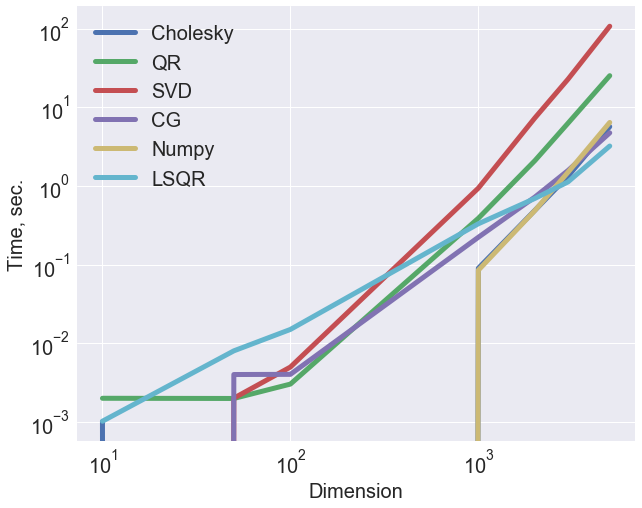

In [7]:
plt.figure(figsize=(10,8))
plt.plot(n, chol_time, linewidth=5, label="Cholesky")
plt.plot(n, qr_time, linewidth=5, label="QR")
plt.plot(n, svd_time, linewidth=5, label="SVD")
plt.plot(n, cg_time, linewidth=5, label="CG")
plt.plot(n, np_time, linewidth=5, label="Numpy")
plt.plot(n, lsqr_time, linewidth=5, label="LSQR")
plt.legend(loc="best", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Dimension", fontsize=20)
plt.ylabel(r"Time, sec.", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)

## Nonlinear least squares problem (J. Nocedal, S. Wright Numerical Optimization, Ch. 10)

**Q:** what if we want model measures of a nonlinear function $f(x, w)$?

**A:** we can use methods of nonlinear optimization!

**BUT!** We have not analytical solution. Therefore, we have to use iterative methods!

### Gauss-Newton method

$$
S = \frac{1}{2}\| f(X, w) - y\|^2_2 = \frac{1}{2}\|r(w)\|_2^2 \to \min_w
$$
$$
S' = \sum_{i=1}^m r_i(w)r_i'(w) = J^{\top}(w)r(w), 
$$
where $J$ is Jacobi matrix of the residual $r(w)$
\begin{equation*}
\begin{split}
S''(w) = & \sum_{i=1}^m r_i'(w)r_i'(w) + \sum_{i=1}^m r_i(w)r_i''(w) \\
= & J^{\top}(w)J(w) + \sum_{i=1}^m r_i(w)r_i''(w)
\end{split}
\end{equation*}

#### Newton method
$$
S''(w_k)h_{k+1} = -J^{\top}(w_k)r(w_k)
$$

$$
\left(J^{\top}(w_k)J(w_k) + \sum_{i=1}^m r_i(w_k)r_i''(w_k)\right) h_{k+1} = -J^{\top}(w_k)r(w_k)
$$

**Q:** what is changed if we add "Gauss" in the algorithm name?

#### Gauss-Newton method
$$
\left(J^{\top}(w_k)J(w_k)\right) h_{k+1} = -J^{\top}(w_k)r(w_k)
$$

**Note:** step size in this method is defined by line search method according to  any of the previuosly described rules.

#### Convergence theorem

**Theorem.** Assume the residuals $r_i(w)$ are bounded, its gradients are Lipschitz, and the Jacobi matrix $J$ is full-rank. Then
$$
\lim_{k \to \infty} J^{\top}(w_k)r_k = 0,
$$
if the step size is chosen according to Armijo and strong Wolf conditions.

#### Speed of convergence

$$
\|w_{k+1} - w^* \|_2 \leq \| (J^{\top}J(w^*))^{-1}H(w^*)\| \|w_k - w^* \|_2 + O(\|w_k - w^* \|^2_2)
$$

- It depends on the ratio between $J^{\top}J$ и $H(w_k) = \sum\limits_{i=1}^m r_i(w_k)r_i''(w_k)$
- The smaller $\| (J^{\top}J(w^*))^{-1}H(w^*) \|$, the faster convergence
- If $H(w^*) = 0$, then convergence is locally quadratic

#### The case fo the large residuals

- In that case we can not discard $H(w_k)$
- It indicates that the chosen model $f(X, w)$ is not adequate for given data
- It requires *hybrid* algorithms, that work as Gauss Newton method in the case of small residuals and as Newton or Quasi-Newton methods in the case of large residuals

### Pro & contra

Pro

- computation of the hessian $r''(w)$ is not required
- from Jacobi matrix to hessian approximation
- hessian approximation often is accurate
- in the case of matrix Jacobi has full rank, it is guaranteed that obtained direction is descent direction
- it has interpretation as linearization of the function $f(x, w)$ near stationary point

Contra

- hessian approximation may be inaccurate 
- if matrix $J^{\top}J$ is close to singular, the solution is not stable, and even convergence is not guaranteed

### Levenberg-Marquardt method

#### What problems do we have now?

- Newton method gives **locally** but **quadratic** convergence
- Singularity of hessian or its approximation leads to unstability of the solution
- Gradient descent converges to stationary point from **any** starting guess, but only **linear**

#### How to solve these problems? At least partially...

**Idea:** separate spectrum of the hessian from zero by auxilliary item in the form $\lambda I$

Levenberg-Marquardt method:
$$
(f''(x_k) + \lambda_k I)h_k = -f'(x_k), \qquad \lambda_k > 0
$$

### Why is it a good idea?

- In the case of $\lambda_k \to 0$ the method works as Newton method
- In the case of $\lambda_k \to \infty$ the method works as gradient descent
- The item $\lambda_k I$ is an estimate of $H(w_k)$ in the Gauss-Newton method
- If the estimate of the hessian $J^{\top}J$ is sparse, then addition of $\lambda_k I$ does not violate sparsity of the hessian estimate

### But we still have one problem....

There are a lot of strategies of choosing $\lambda_k$. The general idea is similar to backtracking:

- set some initial value
- if the function deacresing is large enough, then the method is in the region where quadratic approximation is good. Therefore, we can decrease parameter
- if decreasing is not enough large, then  increase $\lambda_k$, resolve the problem, get new direction $h_k$ and check it

#### Convergence

- Proofs of convergence is difficult because of various strategies of defining $\lambda_k$
- It is guaranteed convergence to the stationary point if the curvature of the function is modeled adequately in every point

### Pro & Contra

Pro

- combination of pro's of previously studied methods
- automatic adaptation to the gradient descent method and Newton method
- better version of Gauss - Newton method
- Hessian estimation still preserves sparsity
- standard technique of solving non linear least squares [[1]](https://en.wikipedia.org/wiki/Levenberg–Marquardt_algorithm#Implementations)

Contra

- lack of universal strategy for choosing $\lambda$
- convergence depends on choice of $\lambda_k$

## Recap

1. Least squares problem
2. Algorithms for the linear case
3. Algorithms for the nonlinear case